#### Data Science Intern @LGM Virtual Internship
#### TASK 1 (BEGINNER LEVEL TASK) 1) Iris Flower Classification ML Project :

### Data Set Information:
The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.
#### Attribute Information:
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
- Iris Setosa
-Iris Versicolour
-Iris Virginica

### Import modules

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

##### DATA EXPLORATION AND ANALYSIS

In [64]:
iris=pd.read_csv("iris_csv.csv")
iris

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [65]:
iris.shape


(150, 5)

In [66]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [67]:
iris.isnull().sum()

sepallength    0
sepalwidth     0
petallength    0
petalwidth     0
class          0
dtype: int64

In [68]:
iris.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [69]:
iris.columns

Index(['sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'class'], dtype='object')

In [70]:
iris.value_counts("class")

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

##### DATA VISUALIZATION

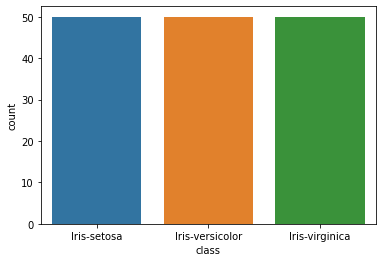

In [71]:
sns.countplot(x='class', data=iris, )
plt.show()

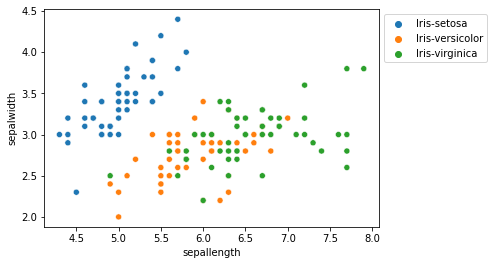

In [72]:
sns.scatterplot(x='sepallength', y='sepalwidth',
                hue='class', data=iris, )
  
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
  
plt.show()

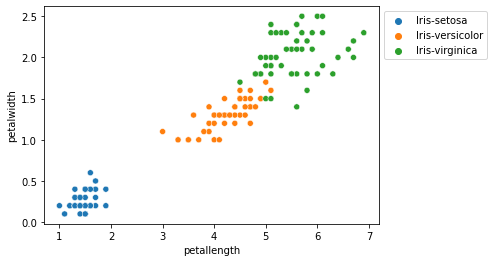

In [73]:
sns.scatterplot(x='petallength', y='petalwidth',
                hue='class', data=iris, )
  
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
  
plt.show()

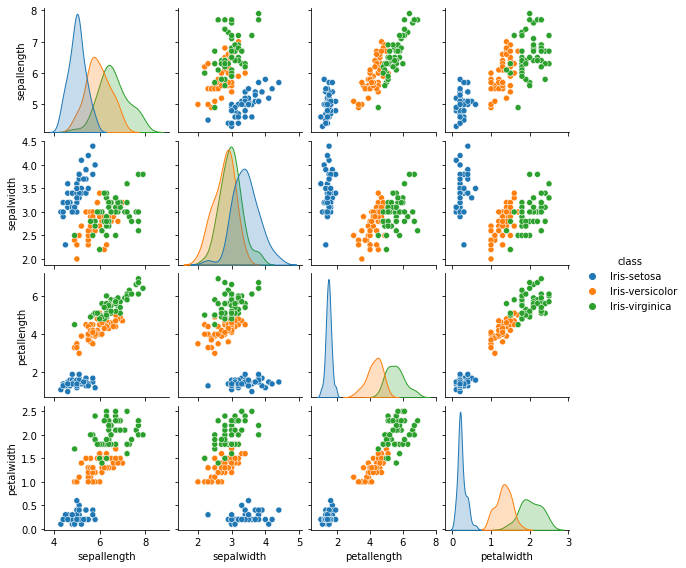

In [74]:
sns.pairplot(iris, hue='class', height=2)

<AxesSubplot:xlabel='class', ylabel='sepalwidth'>

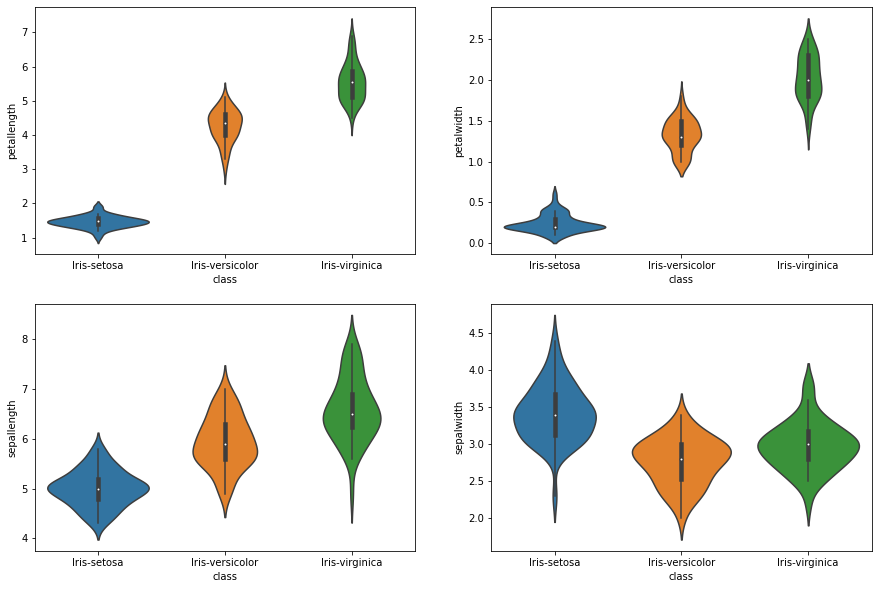

In [75]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='class',y='petallength',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='class',y='petalwidth',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='class',y='sepallength',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='class',y='sepalwidth',data=iris)

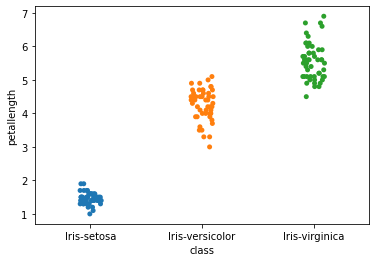

In [76]:
boxp = sns.stripplot(x="class", y="petallength", data=iris, jitter=True, edgecolor="gray")

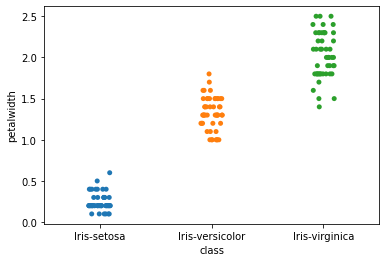

In [77]:
boxp1 = sns.stripplot(x="class", y="petalwidth", data=iris, jitter=True, edgecolor="gray")

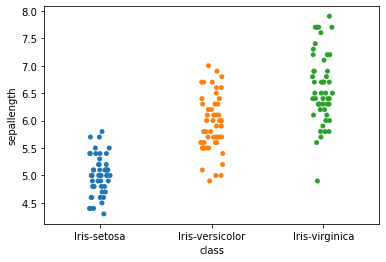

In [78]:
boxp2 = sns.stripplot(x="class", y="sepallength", data=iris, jitter=True, edgecolor="gray")

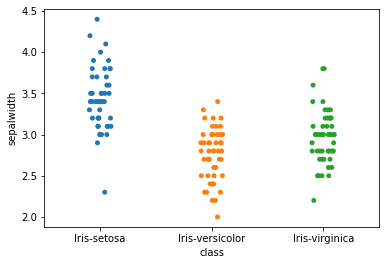

In [79]:
boxp3 = sns.stripplot(x="class", y="sepalwidth", data=iris, jitter=True, edgecolor="gray")

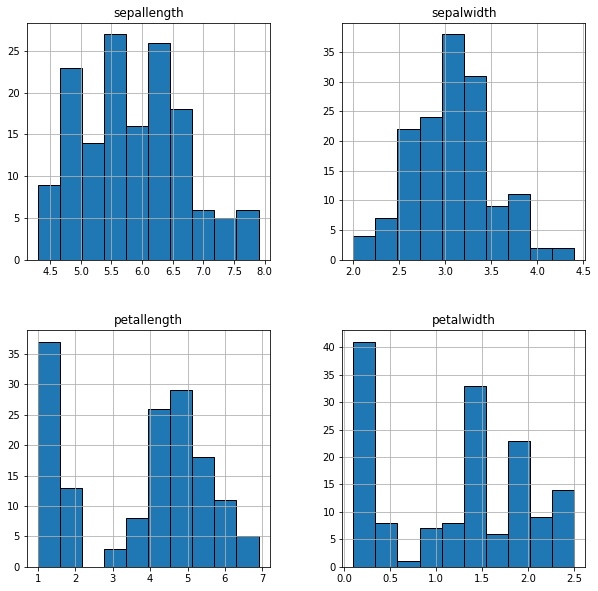

In [80]:
iris.hist(edgecolor='black',figsize=(10,10))
plt.show()

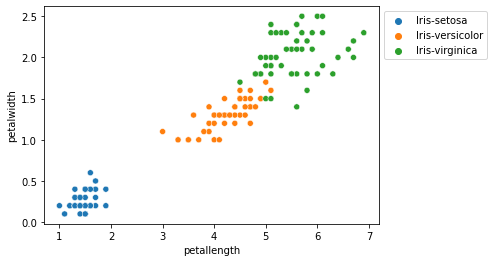

In [81]:
sns.scatterplot(x='petallength', y='petalwidth',
                hue='class', data=iris, )
  
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
  
plt.show()

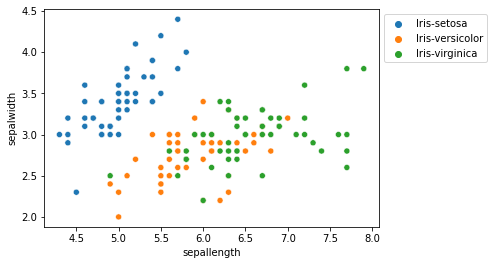

In [82]:
sns.scatterplot(x='sepallength', y='sepalwidth',
                hue='class', data=iris, )
  
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
  
plt.show()

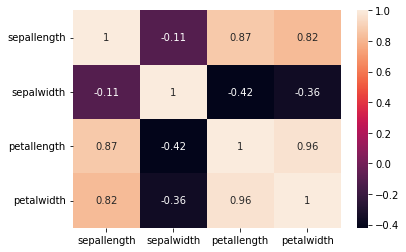

In [83]:
sns.heatmap(iris.corr(method='pearson'),
            annot = True);
  
plt.show()

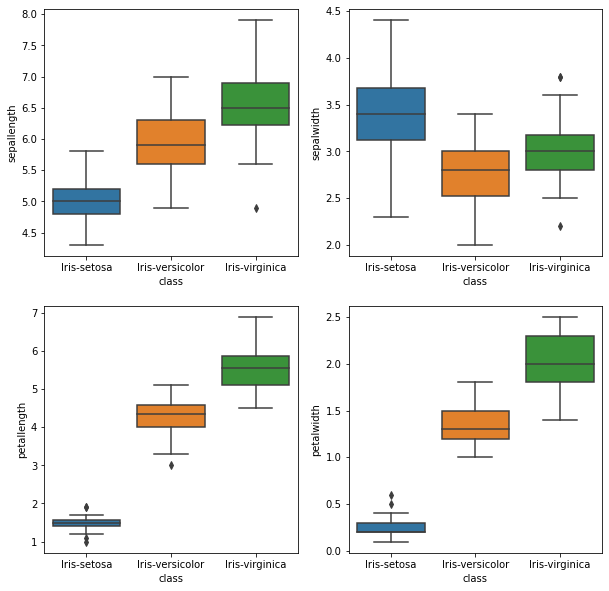

In [84]:
def graph(y):
    sns.boxplot(x="class", y=y, data=iris)
  
plt.figure(figsize=(10,10))
      
# Adding the subplot at the specified
# grid position
plt.subplot(221)
graph('sepallength')
  
plt.subplot(222)
graph('sepalwidth')
  
plt.subplot(223)
graph('petallength')
  
plt.subplot(224)
graph('petalwidth')
  
plt.show()

###### Setting up the Model

In [85]:
train, test = train_test_split(iris, test_size = 0.25,random_state=0)
print(train.shape)
print(test.shape)

(112, 5)
(38, 5)


In [86]:
train_X = train[['sepallength', 'sepalwidth', 'petallength',
                 'petalwidth']]
train_y = train['class']

test_X = test[['sepallength', 'sepalwidth', 'petallength',
                 'petalwidth']]
test_y = test['class']

In [87]:
train_X.head()

,sepallength,sepalwidth,petallength,petalwidth
61,5.9,3.0,4.2,1.5
92,5.8,2.6,4.0,1.2
112,6.8,3.0,5.5,2.1
2,4.7,3.2,1.3,0.2
141,6.9,3.1,5.1,2.3


In [88]:
test_y.head()

114     Iris-virginica
62     Iris-versicolor
33         Iris-setosa
107     Iris-virginica
7          Iris-setosa
Name: class, dtype: object

##### Model Creation - part 1

In [89]:
#Using LogisticRegression
model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('Accuracy:',metrics.accuracy_score(prediction,test_y)*100)

Accuracy: 97.36842105263158


In [90]:
#Confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
confusion_mat = confusion_matrix(test_y,prediction)
print("Confusion matrix: \n",confusion_mat)
print(classification_report(test_y,prediction))

Confusion matrix: 
 [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



In [91]:
#Using Support Vector
from sklearn.svm import SVC
model1 = SVC()
model1.fit(train_X,train_y)

pred_y = model1.predict(test_X)

from sklearn.metrics import accuracy_score
print("Acc=",accuracy_score(test_y,pred_y)*100)

Acc= 97.36842105263158


In [92]:
#Using KNN Neighbors
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(train_X,train_y)
y_pred2 = model2.predict(test_X)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(test_y,y_pred2)*100)

Accuracy Score: 97.36842105263158


In [93]:
#Using GaussianNB
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(train_X,train_y)
y_pred3 = model3.predict(test_X)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(test_y,y_pred3)*100)

Accuracy Score: 100.0


In [94]:
#Using Decision Tree
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model4.fit(train_X,train_y)
y_pred4 = model4.predict(test_X)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(test_y,y_pred4)*100)

Accuracy Score: 97.36842105263158


In [95]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machines', 'KNN' ,'Naive Bayes','Decision Tree'],
    'Score': [97.36, 97.36 ,97.36, 100.00, 97.36]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
100.00,Naive Bayes
97.36,Logistic Regression
97.36,Support Vector Machines
97.36,KNN
97.36,Decision Tree


##### Hence I will use Naive Bayes algorithms for training my model.

#### Model Building- part 2
- We are defining our Naive Bayes model.
- After that fitting/training the model on train_X and train_y using .fit() method.
- Then we are predicting on test_X using .predict() method.

In [97]:
model5 = GaussianNB()
model5.fit(train_X,train_y)
y_pred5 = model5.predict(test_X)

- Now checking the accuracy of our model using
accuracy_score(test_y, y_pred5)
test_y: actual values of test_X
prediction: predicted values of test_X.

- Printing out the classification report using
classification_report(test_y, y_pred5).

In [98]:
print(f'Test Accuracy: {accuracy_score(test_y, y_pred5)}')
print(f'Classification Report: \n {classification_report(test_y, y_pred5)}')

Test Accuracy: 1.0
Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00        16
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38

